### Import stuff

In [ ]:
import random
from src.read_data import DataReader
from src.classification import CommonClassification
from src.preprocessing import CommonPreprocessing

### Setup parameters

In [2]:
DATA_DIR = "../data"
TRAIN_TEST_SPLIT_RATIO = 0.25

### Create required objects

In [3]:
data_reader = DataReader(DATA_DIR)
common_classifier = CommonClassification()
common_preprocessing = CommonPreprocessing()

### Load all KEEL datasets from directory

In [4]:
keel_data = data_reader.read_keel_dat_directory()
print('Read KEEL Datasets: %s' % len(keel_data))

Read KEEL Datasets: 11


### Select random KEEL dataset

Keel Dataset Info:
==> File Name: ecoli-0-1-4-7_vs_5-6.dat
==> Size: 319
==> Features: 6
==> Classes: 2


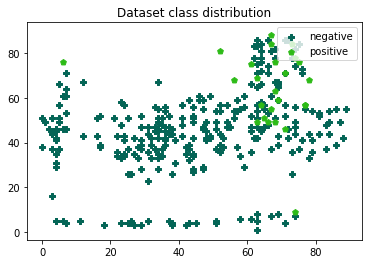

In [5]:
random_keel_data = random.choice(keel_data)
random_keel_data.print_info()
random_keel_data.plot_class_distribution()

### Convert KEEL data to testable collections

Keel Testable Dataset Info:
==> File Name: ecoli-0-1-4-7_vs_5-6.dat
==> Size: 319
==> Features: 6
==> Classes: 2
==> Test-Train Split Ratio: 0.25
==> Train Size: 239
==> Test Size: 80


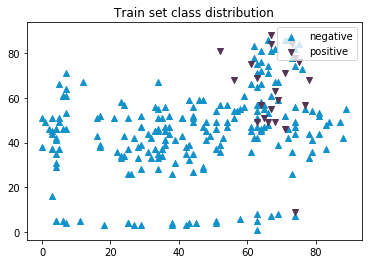

In [6]:
random_testable_keel_data = random_keel_data.as_testable(test_size=TRAIN_TEST_SPLIT_RATIO)
random_testable_keel_data.print_info()
random_testable_keel_data.plot_train_class_distribution()

### Sample data with Random Undersampling

Keel Testable Dataset Info:
==> File Name: ecoli-0-1-4-7_vs_5-6.dat
==> Size: 50
==> Features: 6
==> Classes: 2
==> Test-Train Split Ratio: 0.13636363636363635
==> Train Size: 44
==> Test Size: 6


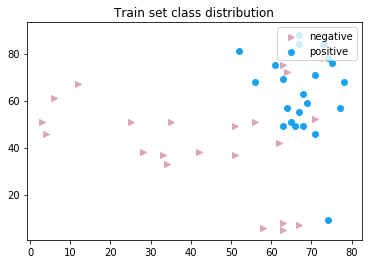

In [7]:
sampled_testable_keel_data = common_preprocessing.random_under_sampling(random_testable_keel_data)
sampled_testable_keel_data.print_info()
sampled_testable_keel_data.plot_train_class_distribution()

### Classify with Naive Bayes Gaussian Classifier

In [8]:
classification_result = common_classifier.naive_bayes_gaussian_classification(random_testable_keel_data)
print('Accuracy: %s' % classification_result.accuracy)

Accuracy: 0.975


### Classify with Decision Tree Classifier

In [9]:
classification_result = common_classifier.decision_tree_classification(random_testable_keel_data)
print('Accuracy: %s' % classification_result.accuracy)

Accuracy: 0.9375


### Classify with Random Forest Classifier


In [10]:
classification_result = common_classifier.random_forest_classification(random_testable_keel_data)
print('Accuracy: %s' % classification_result.accuracy)

Accuracy: 0.9875
